# Create and visualise a solvable maze

## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


random.seed(0)

## Create Maze class

In [50]:
class Maze_0():
    def __init__(self, size):
        """
        Initializes the maze.
        width: number of cells horizontally
        height: number of cells vertically
        """
        assert len(size) == 2, "Size must be a tuple of two integers."
        assert size[0] > 0 and size[1] > 0, "Size must be positive integers."
        self.height, self.width = size
        self.grid = np.ones((2 * self.height + 1, 2 * self.width + 1), dtype=int)  # all walls to start
        # Mark the cell positions (odd indices) as unvisited (0 means a passage will be carved later)
        for i in range(self.height):
            for j in range(self.width):
                self.grid[2*i+1][2*j+1] = 0   
    
        # To track which cells have been visited in the maze generation
        self.visited = np.zeros((self.height, self.width), dtype=bool)
        
    def display(self):
        """Visualize the maze using matplotlib."""
        plt.figure(figsize=(5, 5))
        plt.imshow(self.grid, cmap='binary')
        plt.xticks([]), plt.yticks([])
        plt.title("Maze")
        plt.show()
        
    def generate_maze(self):
        """Generates the maze using recursive backtracking."""
        # Start from a random cell
        row_or_col = random.choice([0, 1])
        if row_or_col == 0:
            # Start from a random row
            start_cell = (random.randint(0, self.height-1), 0)
        else:
            # Start from a random column
            start_cell = (0, random.randint(0, self.width-1))
        # start_cell = (random.randint(0, self.height-1), random.randint(0, self.width-1))
        print("Starting cell:", start_cell)
        self._dfs(start_cell[0], start_cell[1])
        
    def _dfs(self, row, col):
        """Recursive DFS to carve passages in the maze."""
        self.visited[row, col] = True  # mark the start as visited
        
        # Directions: up, down, left, right
        directions = [(0, 1), (0, -1), (-1, 0), (1, 0)]
        
        # Randomize the order of directions
        random.shuffle(directions)
        
        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            
            # Check if the new cell is within bounds and not visited
            if (0 <= new_row < self.height) and (0 <= new_col < self.width) and not (self.visited[new_row, new_col]):                
                # Carve a passage between the current cell and the new cell
                wall_row = row + new_row + 1  # converting to grid indices. Equivalent to ((2*row + 1) + (2*new_row + 1))/2
                wall_col = col + new_col + 1  # same for column
                self.grid[wall_row][wall_col] = 0  # remove the wall
                # print("Visited:", (new_row, new_col))
                # Recur for the new cell
                self._dfs(new_row, new_col)
            # After all directions are explored, backtrack

In [21]:

class Maze():
    def __init__(self, size, start, end):
        """
        Initializes the maze.
        - width: number of cells horizontally
        - height: number of cells vertically
        - start: tuple of (row, col) for start cell
        - end: tuple of (row, col) for end cell
        """
        # Validate inputs
        assert len(size) == 2, "Size must be a tuple of two integers."
        assert size[0] > 0 and size[1] > 0, "Size must be positive integers."
        
        # Initialize the maze size and grid
        self.height, self.width = size
        self.size = size
    
        # To track which cells have been visited in the maze generation
        self.visited = np.zeros((self.height, self.width), dtype=bool)
        
        # Start and end positions
        assert 0 <= start[0] < self.height and 0 <= start[1] < self.width, "Start cell out of bounds."
        assert 0 <= end[0] < self.height and 0 <= end[1] < self.width, "End cell out of bounds."
        self.start = start
        self.end = end
    
    #####  
    
    def display(self):
        """Visualize the maze using matplotlib."""
        plt.figure(figsize=(5, 5))
        plt.imshow(self.grid, cmap='binary')
        plt.xticks([]), plt.yticks([])
        plt.title("Maze")
        plt.show()
    
    #####
        
    def generate_maze(self):
        """Generates the maze using a specific algorithm."""
        raise NotImplementedError("Implement a specific maze. This is the base class.")
        pass
    
    #####
     
    def _carve_path(self):
        """Carves a direct path from start to end to ensure solvability."""
        current = self.start
        # Mark the start cell as visited
        self.visited[current[0]][current[1]] = True
        while current != self.end:
            row, col = current
            end_row, end_col = self.end
            # dr = 0
            # dc = 0
            # if row < end_row:
            #     dr = 1
            # elif row > end_row:
            #     dr = -1
            # if col < end_col:
            #     dc = 1
            # elif col > end_col:
            #     dc = -1
            # If both directions are possible, randomly choose one
            # if dr != 0 and dc != 0:
            if random.random() < 0.5:  # 50% chance to prioritize row or column movement
                dr, dc = 0, 1 if col < end_col else -1  # Move column-first
            else:
                dr, dc = 1 if row < end_row else -1, 0  # Move row-first
            new_row, new_col = (row + dr, col + dc)
            # Remove the wall between current and new cell
            wall_row = row + new_row + 1  # Equivalent to ((2*row + 1) + (2*new_row + 1))/2
            wall_col = col + new_col + 1
            self.grid[wall_row][wall_col] = 0  # remove the wall between the open cells
            # Mark as visited
            self.visited[new_row][new_col] = True            
            # Update current position and loop
            current = (new_row, new_col)
    
    @staticmethod
    def to_maze_coords(state, grid_dimensions):
        """
        Convert a state (x, y) to maze coordinates (row, col) which has gaps for walls.
        Parameters:
        - state: tuple of (x, y) coordinates
        - grid_dimensions: tuple of (height, width) of the maze
        Returns:
        row, col: coordinates in the maze grid with walls...
        """
        x, y = state
        row = 2 * x + 1
        col = 2 * y + 1
        return row, col
    
    #####
     
    def save(self, filename, save_img=False):
        """Saves the maze to a file.
        Parameters:
        - filename: name of the file to save the maze
        - save_img: whether to save the maze as an image.
        """
        if filename is None:
            filename = 'maze'
        # Ensure the filename has a .npy extension
        if not filename.endswith('.npy'):
            filename += '.npy'
        np.save(filename, self.grid)  # can only save the grid
        print(f"Maze saved to {filename}.npy")

        # Save the maze as an image if requested
        if save_img:
            plt.imshow(self.grid, cmap='binary')
            plt.xticks([]), plt.yticks([])
            plt.title("Maze")
            img_filename = filename.replace('.npy', '.png')
            plt.savefig(img_filename)
            print(f"Maze image saved to {img_filename}")
         
    #####        

    def load(self, filename):
        """Loads the maze from a file."""
        if filename is None:
            filename = 'maze'  # assume a default filename
        # Ensure the filename has a .npy extension
        if not filename.endswith('.npy'):
            filename += '.npy'
        try:
            self.grid = np.load(filename)
            print(f"Maze loaded from {filename}.npy")
            self.height, self.width = self.grid.shape  # update height and width from loaded grid
        except FileNotFoundError:
            print(f"File {filename}.npy not found. Please check the filename and try again.")
        
##########

class WalledMaze(Maze):
    def __init__(self, size, start, end):
        """
        Initializes the maze with continuous walls. 0 in grid means a passage, 1 means a wall.
        - size: tuple of (height, width)
        """
        super().__init__(size, start, end)
        self.grid = np.ones((2 * self.height + 1, 2 * self.width + 1), dtype=int)  # all walls to start
        # Mark the cell positions (odd indices) as unvisited/empty (0 means a passage will be carved later)
        for i in range(self.height):
            for j in range(self.width):
                self.grid[2*i+1][2*j+1] = 0  # looks like a chessboard. 0 for every open cell.
    
    #####
    
    def generate_maze(self):
        """Generates the walled maze using recursive backtracking."""
        # Carve a guaranteed path from start to end
        self._carve_path()
        print("Carved path from start to end.")
        
        # Reset the visited cells on the carved path
        self.visited = np.zeros((self.height, self.width), dtype=bool)
        
        # Carve random passages in the maze from the start cell
        self._dfs(self.start[0], self.start[1])
        print("Carved random passages in the maze.")
    
    #####    
        
    def _dfs(self, row, col):
        """Recursive DFS to carve passages in the maze."""
        self.visited[row, col] = True  # mark the start as visited
        
        # Directions: up, down, left, right
        directions = [(0, 1), (0, -1), (-1, 0), (1, 0)]
        
        # Randomize the order of directions
        random.shuffle(directions)
        
        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            
            # Check if the new cell is within bounds and not visited
            if (0 <= new_row < self.height) and (0 <= new_col < self.width) and not (self.visited[new_row, new_col]):                
                # Carve a passage between the current cell and the new cell
                wall_row = row + new_row + 1  # converting to grid indices. 
                wall_col = col + new_col + 1  # same for column
                self.grid[wall_row][wall_col] = 0  # remove the wall
                # print("Visited:", (new_row, new_col))
                # Recur for the new cell
                self._dfs(new_row, new_col)
            # After all directions are explored, backtrack


Starting cell: (0, 2)


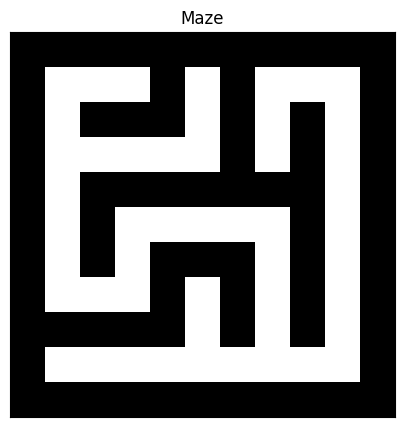

In [51]:
maze = Maze_0((5, 5))
maze.generate_maze()
maze.display()

Carved path from start to end.
Carved random passages in the maze.


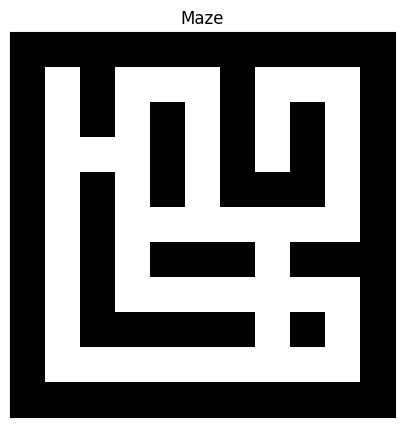

In [30]:
# For a 20x20 maze, with start at (0, 0) and end at (19, 19)
size_ = (5, 5)
start = (0, 0)
end = (4, 4)

maze1 = WalledMaze(size_, start, end)
maze1.generate_maze()
maze1.display()

# maze2 = ObstacleMaze(size_, start, end, obstacle_density=0.1)
# maze2.generate_maze()
# maze2.display()